In [496]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Simple Transcription Factor Shuttling Model

Here, we consider dynamics of transcription factor shuttling with a time rate constant dependent on .  Note that we've included conservation of mass as a consideration, as well as a stable point at $S_0$.

For this, we consider the following system of differential equations, where $x$ is the inactive form of the transcription factor in the cytoplasm and $y$ is the active form in the nucleus where it can bind to DNA. Note that $p$ represents some factor related to ROS concentration, while $r$ is initially a constant.

$$\frac{dx}{dt} = -px + rt$$

$$\frac{dy}{dt} = px - rt$$

We find, first by solving the homogeneous system and then guessing a linear system to find the particular solution:

$$\begin{bmatrix}x\\y\end{bmatrix} = C_1\begin{bmatrix}0\\1\end{bmatrix} + C_2 \begin{bmatrix}1\\-1\end{bmatrix}e^{-pt} + t\begin{bmatrix}\frac{r}{p}\\-\frac{r}{p}\end{bmatrix} + \begin{bmatrix}-\frac{r}{p^2}\\\frac{r}{p^2}\end{bmatrix}$$
Where $C_1, C_2$ depend on initial conditions:

$$C_1 = x_0 + y_0$$

$$C_2 = x_0 + \frac{r}{p^2}$$

Note that, for this example, at stationary time, we have nullclines at $x = \frac{rt}{p}$. Note that we have fixed points along the line denoted by the vector (0,1), as this is the eigenvalue associated with zero. However, this is shifted in time because the system is non-homogeneous.

Now, we aim to solve this system numerically:


In [447]:
#Function to calculate [x(t), y(t)] based on [x_0, y_0], t, and parameters.
def simple_shuttling(S, t, p = 0.5, r = 0.005):
    x = (S[0] + r/p**2)*np.exp(-p*t) + t * r/p + -r/p**2
    y = (S[0] + S[1])- (S[0] + r/p**2)*np.exp(-p*t) + t * (-r/p) + r/p**2
    return [x, y]
    #return (S[0] + S[1])*np.array([0,1]) + (S[0] + r/p**2)*np.array([1, -1])*np.exp(-p*t) +\
    #        t * np.array([r/p, -r/p]) + np.array([-r/p**2, r/p**2]) 

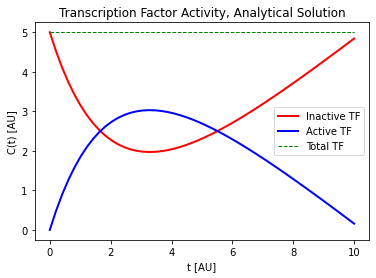

In [736]:
T = np.linspace(0, 10)
S = [5, 0]
res_x = []
res_y = []
for t in T:
    res = simple_shuttling(S, t, p = 0.5, r = 0.3)
    res_x.append(res[0])
    res_y.append(res[1])
plt.plot(T, res_x, 'r-', linewidth = 2.0)
plt.plot(T, res_y, 'b-', linewidth = 2.0)
result = []
for i in range (len(res_x)):
    result.append(res_x[i] + res_y[i]) 
plt.plot(T, result, 'g--', linewidth = 1.0)

plt.title("Transcription Factor Activity, Analytical Solution")
plt.xlabel("t [AU]")
plt.ylabel("C(t) [AU]")
plt.legend(["Inactive TF", "Active TF", "Total TF"])

# Numerical Simulation -- Simple Shuttling

In [480]:
def simpleF(S, t, P = 0.01, r = 0.0005):
    if (S[0] >=0 and S[1] >= 0):
        dFidt = -P*S[0] + r*t
        dFadt = P*S[0] - r*t
        return [dFidt, dFadt]
    return [0,0]

In [481]:
t = np.linspace(0, 10)
S_1 = [5, .0]
res_Foxo = odeint(simpleF, S_1, t, args = (0.5, 0.3))

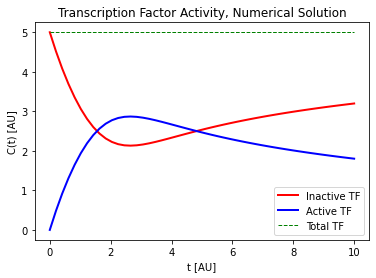

In [735]:
plt.plot(t, res_Foxo[:, 0] , 'r-', linewidth = 2.0)
plt.plot(t, res_Foxo[:, 1] , 'b-', linewidth = 2.0)
plt.plot(t, res_Foxo[:,0] + res_Foxo[:,1], 'g--', linewidth = 1.0)
plt.title("Transcription Factor Activity, Numerical Solution")
plt.xlabel("t [AU]")
plt.ylabel("C(t) [AU]")
plt.legend(["Inactive TF", "Active TF", "Total TF"])

# Concentration-dependent rate constants

Here, we consider the rate constants that are concentration dependent for each individual transcription factor interaction. Here, we assume that $r = k \frac{y}{x}$ for the purpose of maintaining a higher rate of transport from the nucleus when there is already a high concentration of TF in the nucleus. 
This produces a system of nonlinear differential equations, which we solve numerically below.

In [506]:
def nonlinearF(S, t, P = 0.5, r_k = 0.3):
    r = r_k*S[1]/S[0]
    dFidt = -P*S[0] + r*t
    dFadt = P*S[0] - r*t
    return [dFidt, dFadt]

In [507]:
t = np.linspace(0, 10)
S_1 = [5, 0]
res_Foxo = odeint(nonlinearF, S_1, t, (0.5, 0.3))

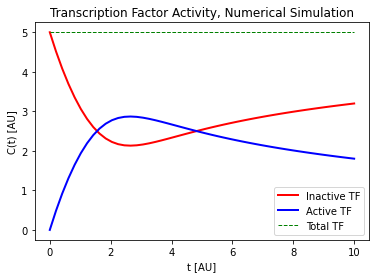

In [733]:
plt.plot(t, res_Foxo[:, 0] , 'r-', linewidth = 2.0)
plt.plot(t, res_Foxo[:, 1] , 'b-', linewidth = 2.0)
plt.plot(t, res_Foxo[:,0] + res_Foxo[:,1], 'g--', linewidth = 1.0)
#plt.plot(t, res[:, 2] , 'g-', linewidth = 2.0)
plt.title("Transcription Factor Activity, Numerical Simulation")
plt.xlabel("t [AU]")
plt.ylabel("C(t) [AU]")
plt.legend(["Inactive TF", "Active TF", "Total TF"])

In [806]:
t = np.linspace(0, 10)
S_1 = [5, 0]
res_Foxo = odeint(nonlinearF, S_1, t, (.5, .3))

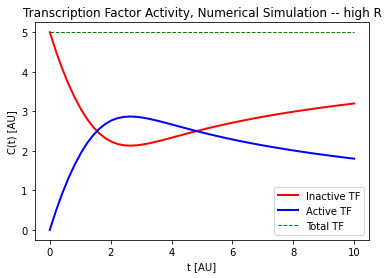

In [807]:
plt.plot(t, res_Foxo[:, 0] , 'r-', linewidth = 2.0)
plt.plot(t, res_Foxo[:, 1] , 'b-', linewidth = 2.0)
plt.plot(t, res_Foxo[:,0] + res_Foxo[:,1], 'g--', linewidth = 1.0)
#plt.plot(t, res[:, 2] , 'g-', linewidth = 2.0)
plt.title("Transcription Factor Activity, Numerical Simulation -- high R")
plt.xlabel("t [AU]")
plt.ylabel("C(t) [AU]")
plt.legend(["Inactive TF", "Active TF", "Total TF"])

# Consideration of time-dependent ROS signaling

Now, we transition to a preliminary investigation of time-dependent ROS signaling.  This means that our proxy variable, P, is now a function P(t) representing the activity of signaling protein that binds to ROS and then activates our transcription factor. These relationships are described below -- note that our equations are generally nonlinear.

### Governing ROS/P(t) dynamics:
Rate of change of ROS concentration. This describes the interaction between ROS and protein P, wherein ROS is "cleared" from the cytoplasm as it interacts with P.  
$$\frac{dR}{dt} = -k_r[R][P]$$

Rate of change of protein P.  We have first-order binding kinetics of both substrate and reactant:
$$\frac{dP}{dt} = v_{max}  \frac{[P]}{(k_p + [P])}\frac{[R]}{(k_r + [R])}$$

While changing the order of the kinetics will change ROS-P interaction curves, it does not have much effect on the TF dynamics.

### Governing TF activation and inactivation:
Our system is very similar to the above techniques.  Here, we note that 

In [767]:
# [R, P, T_I, T_A]
def time_dep_TF(S, t, P = 0.5, r_k = 0.05, v_max = 1, k = 0.4, k_r = 0.1):
    r = r_k*S[3]/S[2]
    dRdt = -k_r*S[0]*S[1]/(k + S[1]) #-P
    dPdt = v_max *S[1]/(k + S[1]) - 1/S[0]*t#*S[0]/(k + S[0])#dPdt = v_max *S[0]/(k + S[0])#
    dTidt = -k*S[1]*S[2] + r*t
    dTadt = k*S[1]*S[2] - r*t
    return [dRdt, dPdt, dTidt, dTadt]


In [768]:
t = np.linspace(0, 10)
S_1 = [5, .5, 5, 0]
res_ROS = odeint(time_dep_TF, S_1, t)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.2147710858869D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.2147710858869D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.2694475147932D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.2694475147932D-15
 lsoda--  warning..internal t (=r1) 

/opt/homebrew/anaconda3/envs/spyder-5.1.5/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.1684046967458D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.1684046967458D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.1684046967458D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6103372695576D+01   r2 =  0.1684046967458D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r

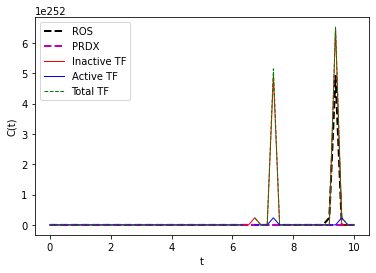

In [769]:
plt.plot(t, res_ROS[:, 0] , 'k--', linewidth = 2.0)
plt.plot(t, res_ROS[:, 1] , 'm--', linewidth = 2.0)
plt.plot(t, res_ROS[:, 2] , 'r-', linewidth = 1.0)
plt.plot(t, res_ROS[:, 3] , 'b-', linewidth = 1.0)
plt.plot(t, res_ROS[:,2] + res_ROS[:,3], 'g--', linewidth = 1.0)
#plt.plot(t, res[:, 2] , 'g-', linewidth = 2.0)
plt.xlabel("t")
plt.ylabel("C(t)")
plt.legend(["ROS", "PRDX","Inactive TF", "Active TF", "Total TF"])

# Phasic Dynamics